In [ ]:
from src.factor.optimizer.api import PortfolioOptimizer
config_path = 'custom_opt_config.yaml'

optim = PortfolioOptimizer('quadprog')
optim.setup_optimizer(config_path)

s0 = optim.optimize(20240530)
s0


In [ ]:
from src.factor.basic import RISK_MODEL
risk_model = RISK_MODEL.get(20240606)

In [12]:
grp.calc_rslt[grp.calc_rslt['benchmark'].isna()]

,weight_type,date,factor_name,ret,cum_ret,benchmark
0,long,20230703,factor1,-0.002654,-0.002654,None
1,long,20230703,factor1,-0.002654,-0.000125,None
2,long,20230710,factor1,0.002496,-0.000158,None
3,long,20230710,factor1,0.002496,0.004536,None
4,long,20230717,factor1,0.002319,0.002161,None
...,...,...,...,...,...,...
439,short,20240314,factor2,0.000121,-0.000507,None
440,short,20240321,factor2,-0.006834,-0.015759,None
441,short,20240321,factor2,-0.006834,-0.007342,None
442,short,20240328,factor2,-0.002360,-0.021361,None


factor1 default
factor1 csi300
factor1 csi500
factor1 csi1000
factor2 default
factor2 csi300
factor2 csi500
factor2 csi1000


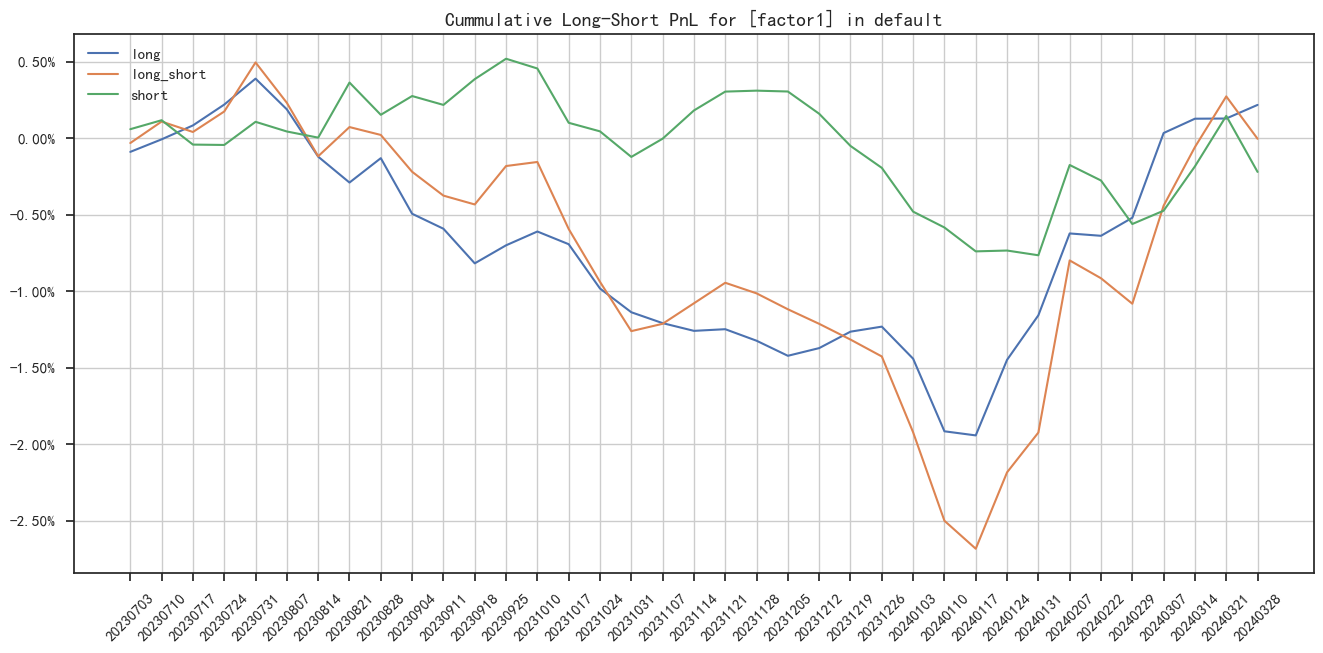

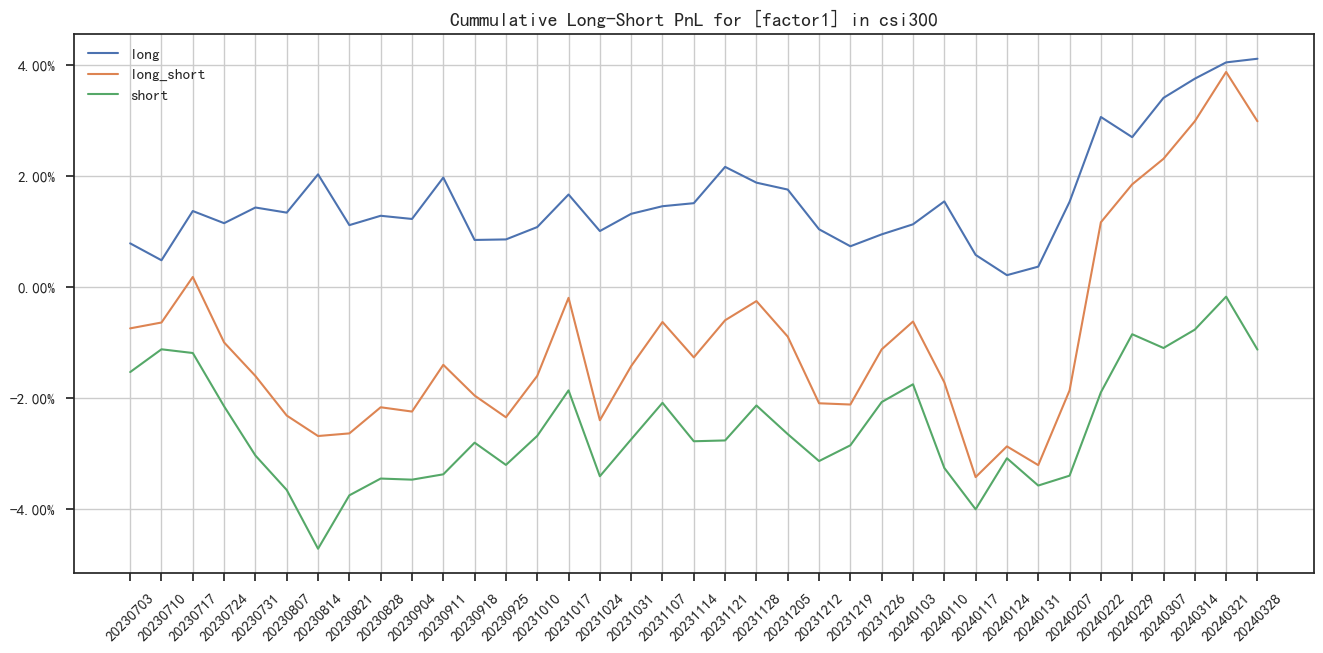

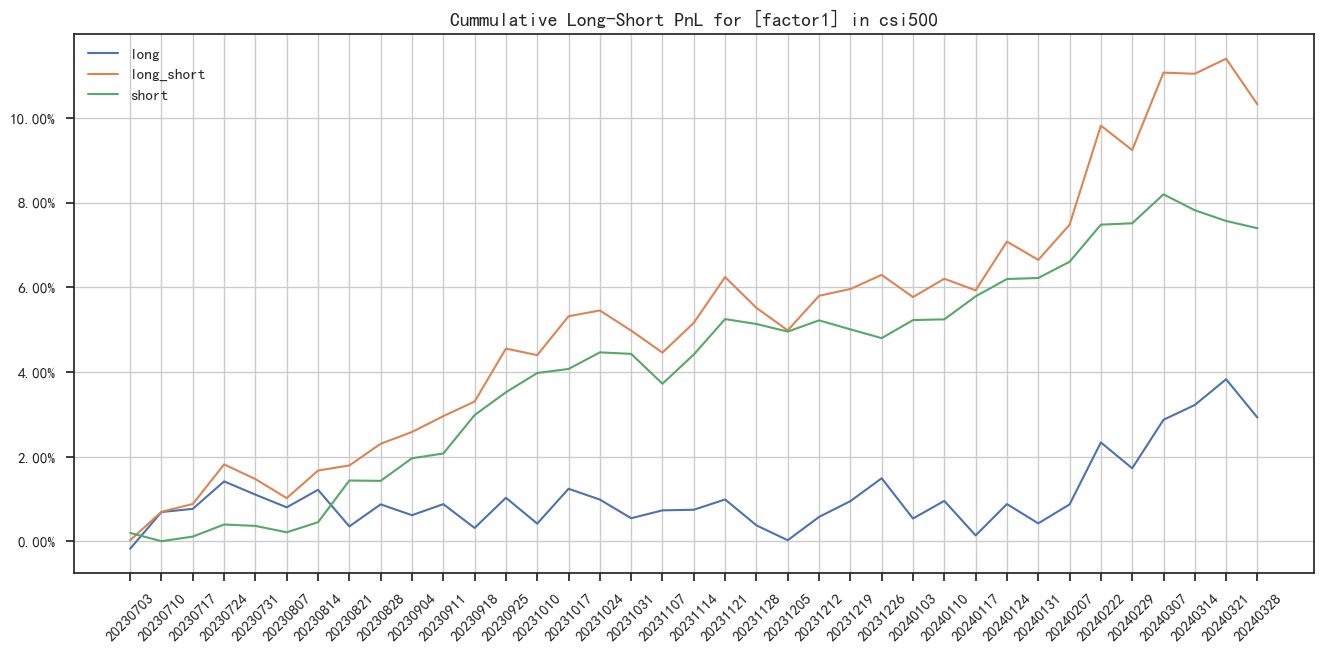

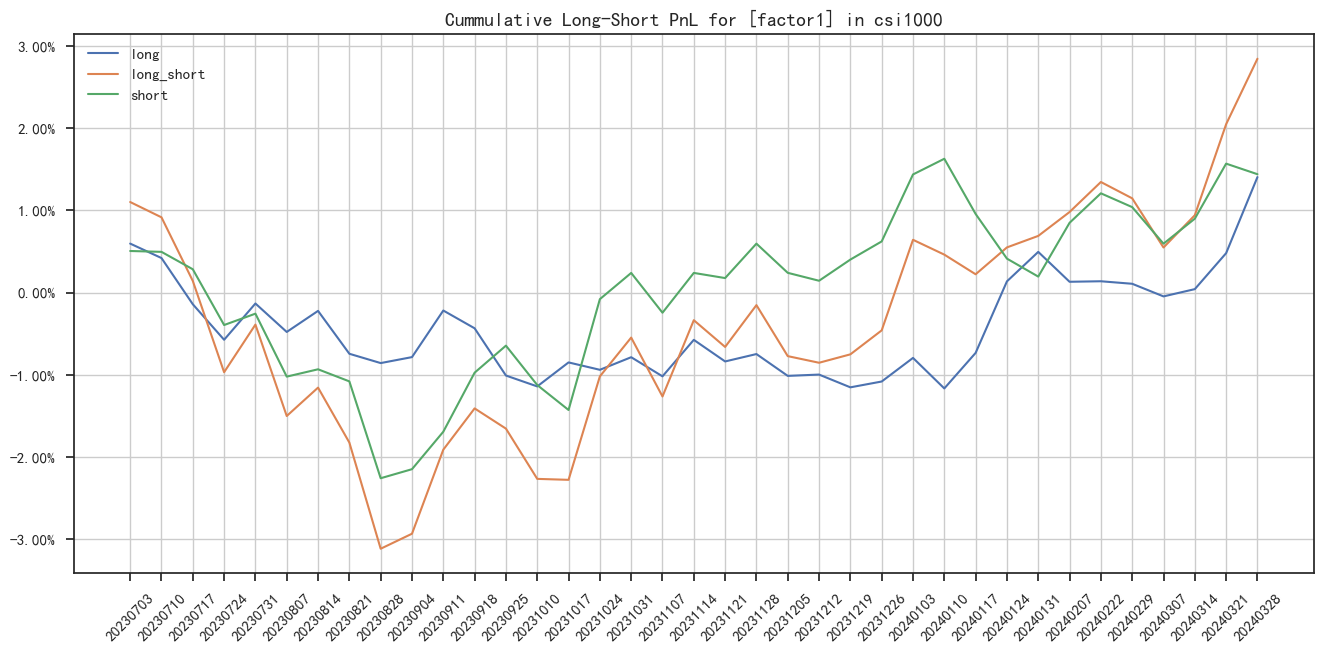

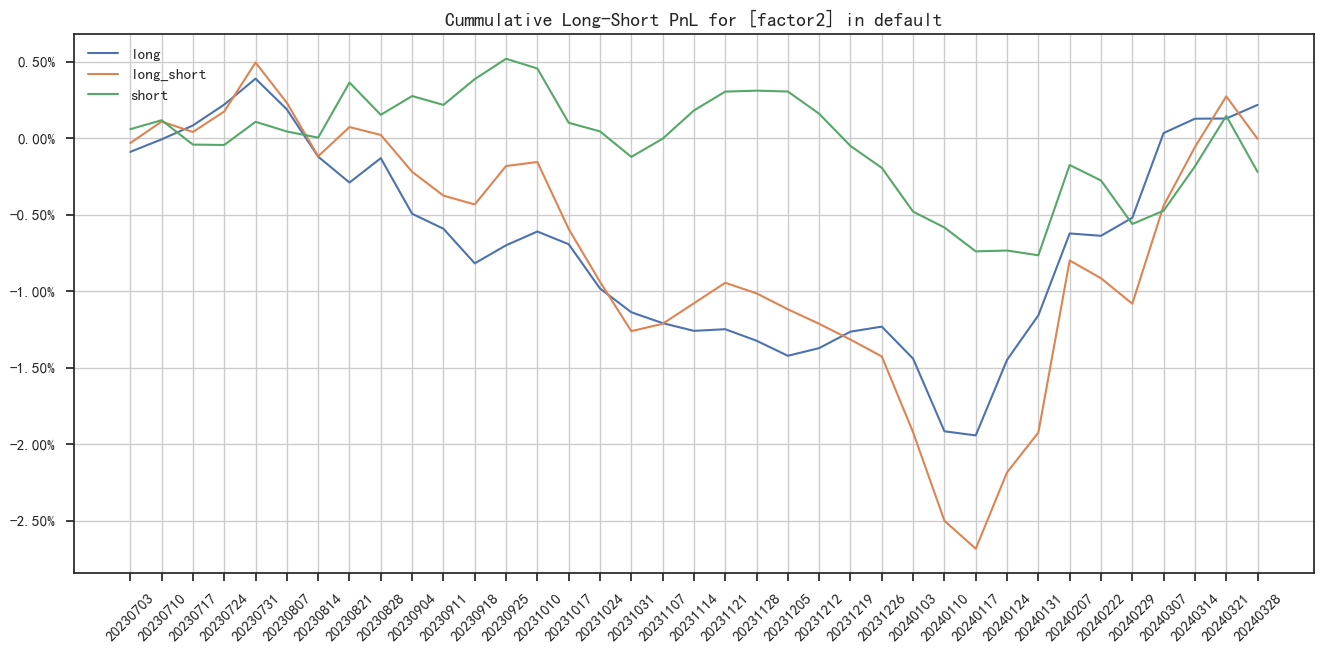

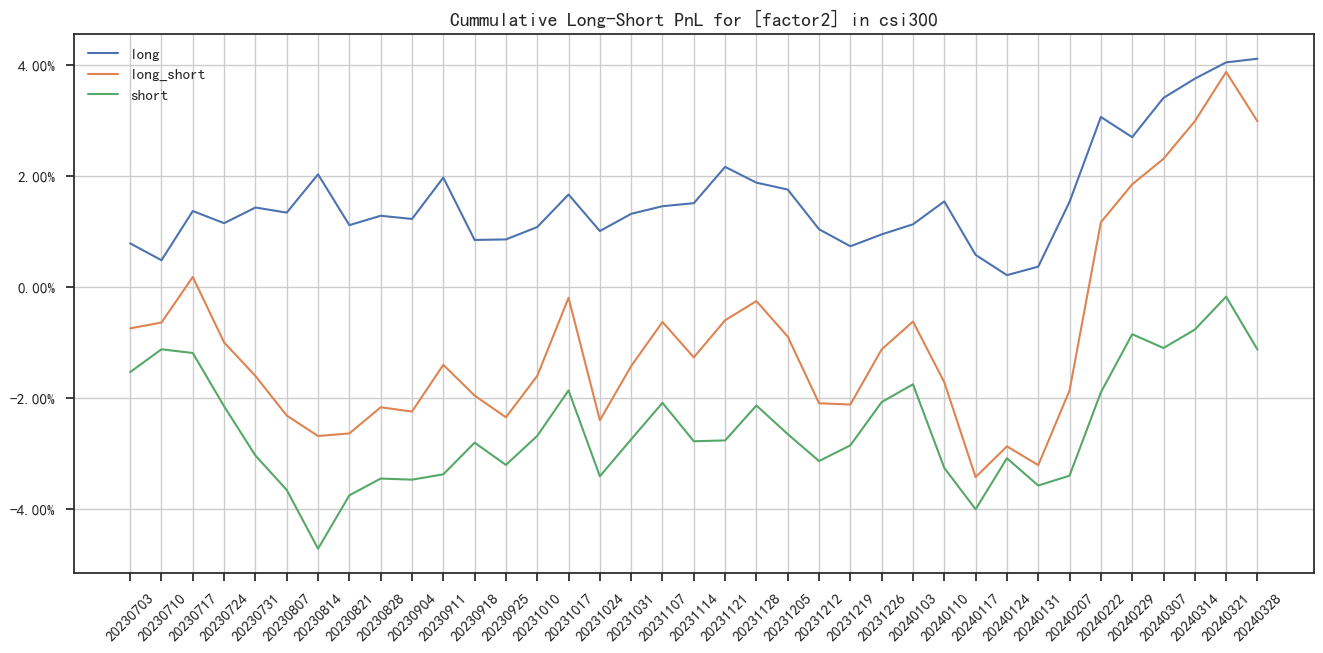

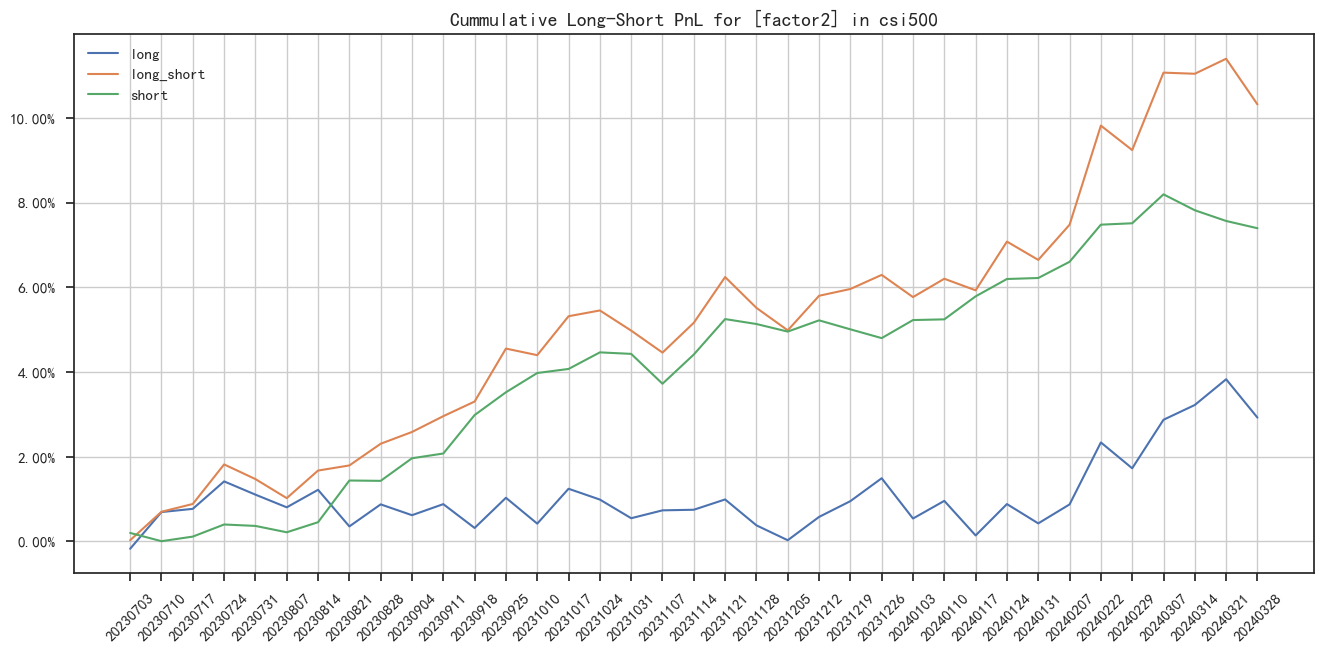

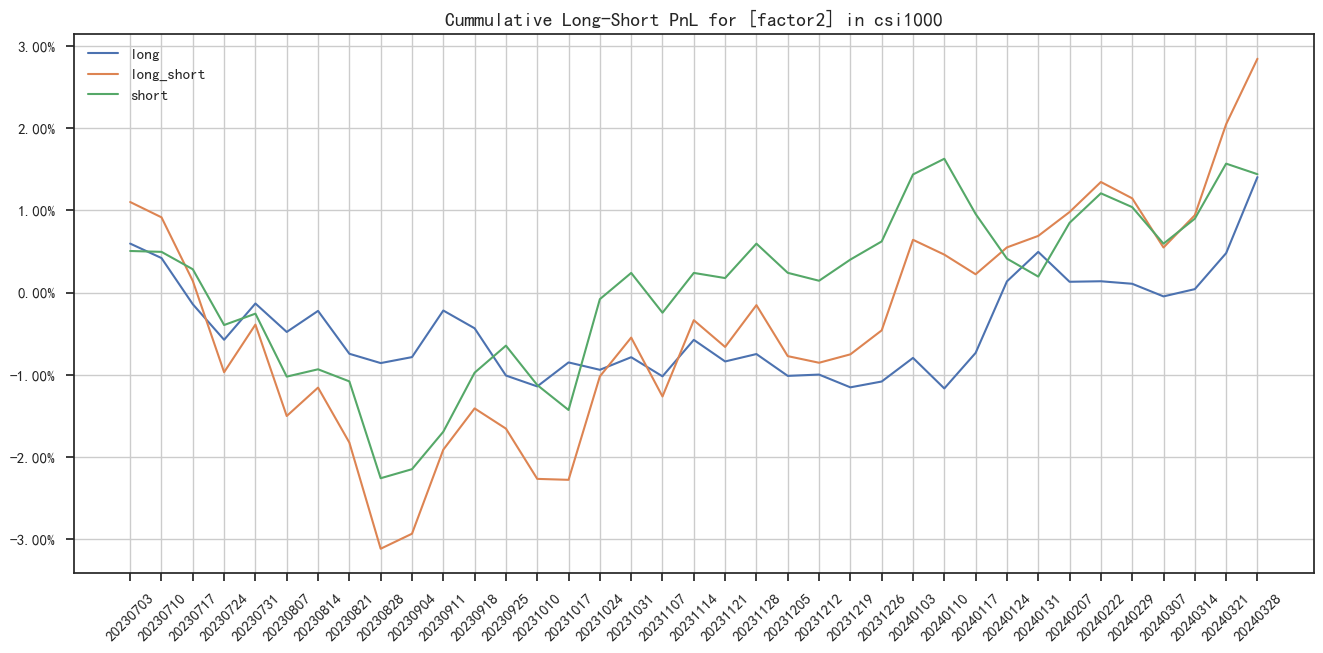

In [1]:
from src.factor.perf.api import PnLCurve , Benchmark , ICDecay
from src.factor.basic import DATAVENDOR , AlphaModel

factor_val = DATAVENDOR.random_factor(20230701 , 20240331 , nfactor=2).to_dataframe()
benchmark  = None # Benchmark('csi500')

grp = PnLCurve()
fig = grp.calc(factor_val , benchmark).plot(True)

In [5]:
fig.fig

{'factor1': {'csi500': <Figure size 1600x700 with 1 Axes>},
 'factor2': {'csi500': <Figure size 1600x700 with 1 Axes>}}

factor1 csi500
factor2 csi500


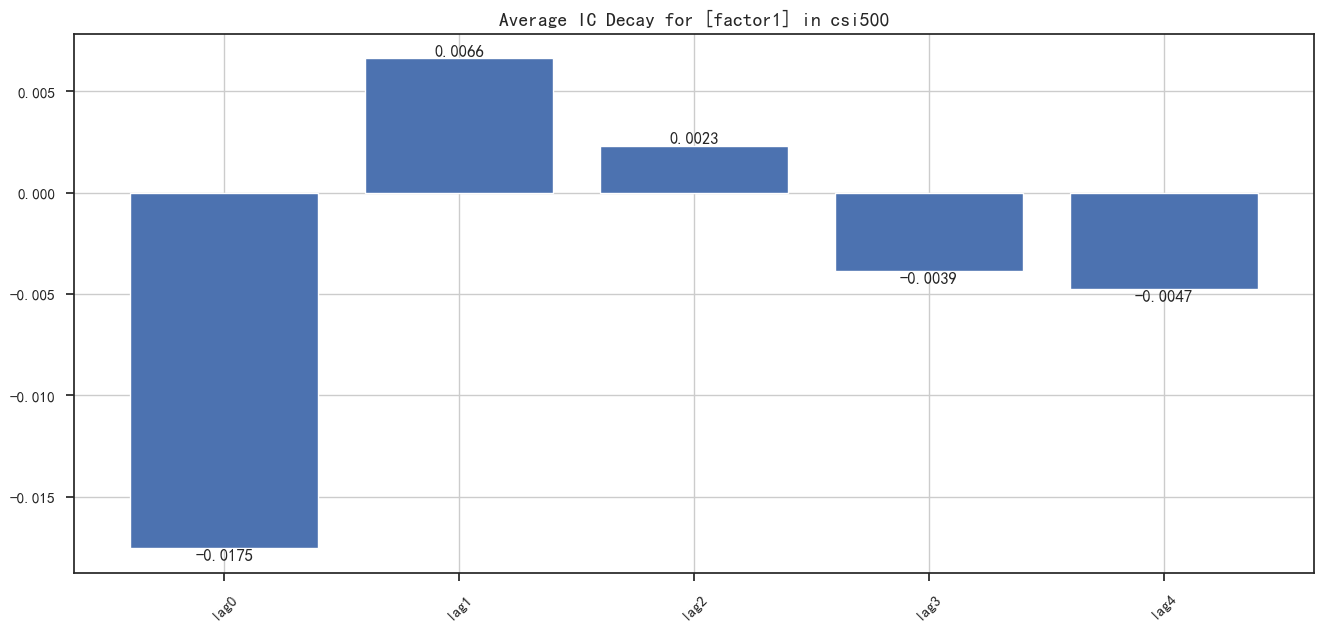

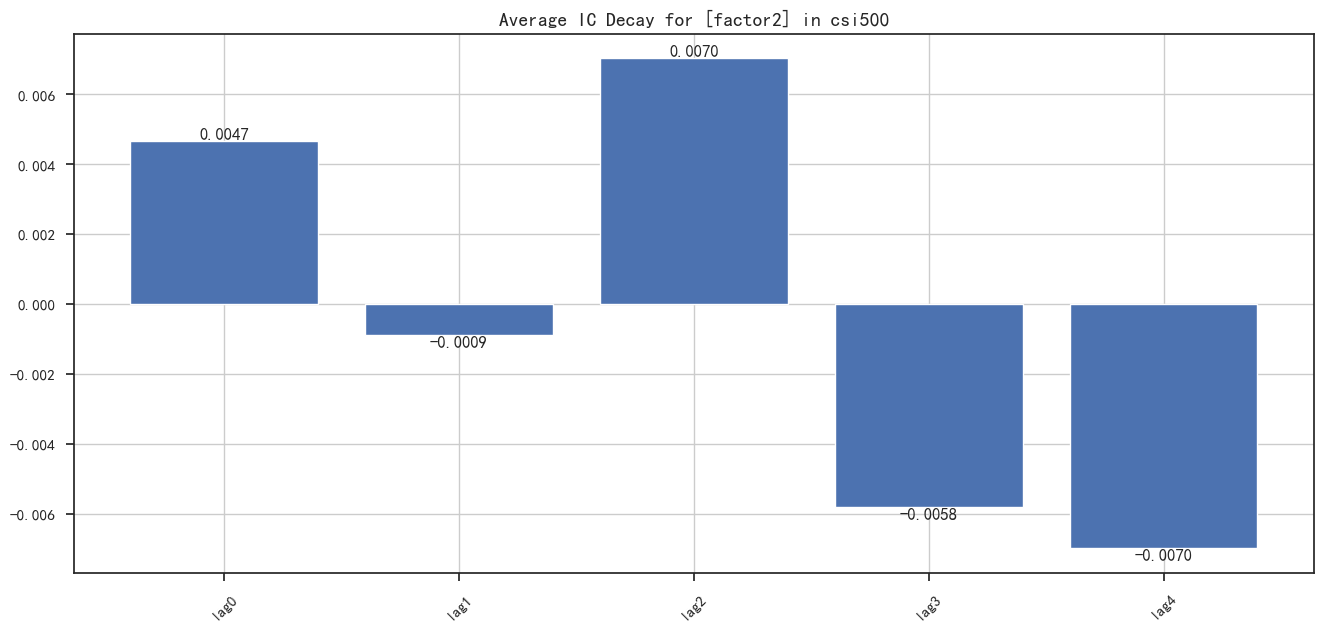

In [3]:
from src.factor.perf.api import PnLCurve , Benchmark , ICDecay
from src.factor.basic import DATAVENDOR , AlphaModel

factor_val = DATAVENDOR.random_factor(20230701 , 20240331 , nfactor=2).to_dataframe()
benchmark  = Benchmark('csi500')

grp = ICDecay()
fig = grp.calc(factor_val , benchmark).plot(True)

In [1]:
from src.factor.fmp.api import main_test
from src.factor.fmp.stat import calc_fmp_account
acc = main_test(2 , verbosity=2)

df = calc_fmp_account(acc)

Group optimization of 2 alphas , 2 benchmarks , 2 lags , 13 dates , (104 opts) start!
Done Optimize [factor1.csi300  ] at 20230703 , time cost (ms) : {'parse_input': 29.71, 'solve': 115.82, 'output': 31.24}
Done Optimize [factor1.csi500  ] at 20230703 , time cost (ms) : {'parse_input': 31.25, 'solve': 84.66, 'output': 14.61}
Done Optimize [factor1.csi300.1] at 20230703 , time cost (ms) : {'parse_input': 27.59, 'solve': 100.82, 'output': 16.7}
Done Optimize [factor1.csi500.1] at 20230703 , time cost (ms) : {'parse_input': 33.66, 'solve': 98.9, 'output': 16.99}
Done Optimize [factor2.csi300  ] at 20230703 , time cost (ms) : {'parse_input': 31.74, 'solve': 96.91, 'output': 3.77}
Done Optimize [factor2.csi500  ] at 20230703 , time cost (ms) : {'parse_input': 31.28, 'solve': 85.57, 'output': 16.41}
Done Optimize [factor2.csi300.1] at 20230703 , time cost (ms) : {'parse_input': 17.03, 'solve': 99.68, 'output': 16.6}
Done Optimize [factor2.csi500.1] at 20230703 , time cost (ms) : {'parse_inpu

In [2]:
df

,model_date,trade_date,period_end,pf,bm,turn,excess,analytic,attribution,factor_name,benchmark,lag
0,20230703,20230704,20230710,-0.011303,-0.011554,1.0,0.000252,Analytic(20230703),Attribution(20230704-20230710),factor1,csi300,0
1,20230710,20230711,20230717,0.008750,0.010770,0.2,-0.002019,Analytic(20230710),Attribution(20230711-20230717),factor1,csi300,0
2,20230717,20230718,20230724,-0.008125,-0.014250,0.2,0.006125,Analytic(20230717),Attribution(20230718-20230724),factor1,csi300,0
3,20230724,20230725,20230731,0.052836,0.055749,0.2,-0.002912,Analytic(20230724),Attribution(20230725-20230731),factor1,csi300,0
4,20230731,20230801,20230807,-0.002925,-0.005989,0.2,0.003064,Analytic(20230731),Attribution(20230801-20230807),factor1,csi300,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,20230828,20230829,20230904,0.047575,0.032896,0.2,0.014680,None,None,factor2,csi500,1
100,20230904,20230905,20230911,0.009112,-0.009447,0.2,0.018560,None,None,factor2,csi500,1
101,20230911,20230912,20230918,-0.008950,-0.009530,0.2,0.000580,None,None,factor2,csi500,1
102,20230918,20230919,20230925,-0.012272,-0.009252,0.2,-0.003020,None,None,factor2,csi500,1


In [107]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from plottable import ColumnDefinition, ColDef, Table
from plottable.formatters import decimal_to_percent
from matplotlib.figure import Figure
from matplotlib.ticker import FuncFormatter
from packaging import version
from typing import Any , Callable , Literal , Optional

# for Chinese
sns.set_theme(context='notebook', style='ticks', font='SimHei', rc={'axes.unicode_minus': False})
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def pct_fmt(temp : float, position : int = 2): return f'{temp:.2%}'
def pct_d2f(temp : Any, position : int = 2): return f'{temp:.2f}'
def bm_name(bm : Any | str | None):
    if bm is None or bm == '': return 'default'
    elif isinstance(bm ,str) : return bm
    else: return bm.name

def multi_factor_plot(func : Callable):
    def wrapper(df : pd.DataFrame , *args , factor_name : Optional[str] = None , benchmark : Optional[str] = None , **kwargs) -> dict[str,dict[str,Figure]]:
        factor_list = [factor_name] if factor_name else df['factor_name'].unique()
        if 'benchmark' in df.columns:
            bench_list  = [benchmark]   if benchmark   else df['benchmark'].unique()
            return {fn:{bm_name(bn):func(df , *args , factor_name = fn , benchmark = bn , **kwargs) for bn in bench_list} for fn in factor_list}
        else:
            bn = None
            return {fn:{bm_name(bn):func(df , *args , factor_name = fn , benchmark = bn , **kwargs)} for fn in factor_list}
    return wrapper

def plot_head(df : pd.DataFrame , factor_name : Optional[str] = None , benchmark : Optional[str | Any] = None) -> tuple[pd.DataFrame , Figure]:
    assert factor_name is not None and (factor_name in df['factor_name'].values) , factor_name
    if df.index.name: df = df.reset_index() 
    df = df[df['factor_name'] == factor_name].drop(columns=['factor_name'])
    if 'benchmark' in df.columns:
        assert benchmark in df['benchmark'].values , (benchmark , df)
        df = df[df['benchmark'] == benchmark].drop(columns=['benchmark'])
    for col in df.columns:
        if col.endswith('date'): df[col] = df[col].astype(str)
    fig = plt.figure(figsize=(16, 7))
    return df , fig

def plot_tail(title_head : str , factor_name : Optional[str] = None , benchmark : Optional[str] = None , show = False , suptitle = False):
    title = f'{title_head} for [{factor_name}]'
    if benchmark: title += f' in {benchmark}'
    plt.suptitle(title , fontsize = 14) if suptitle else plt.title(title , fontsize = 14)
    plt.xticks(rotation=45)  
    if not show: plt.close()

In [114]:
from src.func import date_diff
def eval_drawdown(v : pd.Series | np.ndarray | Any , how : Literal['exp' , 'lin'] = 'lin'):
    if isinstance(v , np.ndarray): v = pd.Series(v)
    if how == 'lin':
        cum = v.cumsum() + 1.
        cummax = cum.cummax()
        cummdd = cummax - cum
    else:
        cum = (v + 1.).cumprod()
        cummax = cum.cummax()
        cummdd = 1 - cum / cummax
    return cummdd

def eval_drawdown_st(v : pd.Series | np.ndarray | Any , how : Literal['exp' , 'lin'] = 'lin'):
    if isinstance(v , np.ndarray): v = pd.Series(v)
    if how == 'lin':
        cum = v.cumsum() + 1.
    else:
        cum = (v + 1.).cumprod()
    return cum.expanding().apply(lambda x: x.argmax(), raw=True).astype(int)

def eval_max_drawdown(v : pd.Series | np.ndarray | Any , how : Literal['exp' , 'lin'] = 'lin'):
    dd , st = eval_drawdown(v , how) , eval_drawdown_st(v , how)
    mdd = dd.max()
    idx_ed = int(dd.argmax())
    idx_st = int(st.iloc[idx_ed])

    return mdd , idx_st , idx_ed

def eval_fmp_stats(grp : pd.DataFrame , mdd_period = True , **kwargs):
    period_len = abs(date_diff(grp['trade_date'].min() , grp['period_end'].max()))
    period_n   = len(grp)

    pf_ret = np.prod(grp['pf'] + 1) - 1.
    bm_ret = np.prod(grp['bm'] + 1) - 1.
    excess = (pf_ret - bm_ret)
    ex_ann = np.power(np.prod(1 + grp['excess']) , 365 / period_len) - 1
    # pf_mdd = eval_max_drawdown(grp['pf'] , 'exp')
    ex_mdd , ex_mdd_st , ex_mdd_ed = eval_max_drawdown(grp['excess'] , 'lin')
    te     = np.std(grp['excess']) * np.sqrt(365 * period_n / period_len)
    ex_ir  = ex_ann / te
    ex_calmar = ex_ann / ex_mdd
    turn   = np.sum(grp['turn'])
    rslt = pd.DataFrame({'pf':pf_ret , 'bm':bm_ret , 'excess' : excess , 'annualized' : ex_ann , 'mdd' : ex_mdd , 
                         'te' : te , 'ir' : ex_ir , 'calmar' : ex_calmar , 'turnover' : turn} , index = [0])
    if mdd_period:
        rslt['mdd_period'] = ['{}-{}'.format(grp['trade_date'].iloc[ex_mdd_st] , grp['trade_date'].iloc[ex_mdd_ed])]
    return rslt.assign(**kwargs)


,factor_name,benchmark,year,pf,bm,excess,annualized,mdd,te,ir,calmar,turnover,mdd_period
0,factor1,csi300,2023,-0.002348,-0.093175,0.090827,0.417480,0.014200,0.049059,8.509705,29.401004,6.703603,20230815-20230822
1,factor1,csi500,2023,-0.066717,-0.124647,0.057930,0.261028,0.027985,0.075937,3.437422,9.327467,6.769971,20230815-20230919
2,factor2,csi300,2023,-0.127521,-0.093175,-0.034346,-0.141455,0.059837,0.061541,-2.298532,-2.364002,6.682439,20230704-20230801
3,factor2,csi500,2023,-0.161412,-0.124647,-0.036765,-0.145688,0.063007,0.056379,-2.584093,-2.312249,6.674299,20230704-20230822
0,factor1,csi300,all,-0.002348,-0.093175,0.090827,0.417480,0.014200,0.049059,8.509705,29.401004,6.703603,20230815-20230822
1,factor1,csi500,all,-0.066717,-0.124647,0.057930,0.261028,0.027985,0.075937,3.437422,9.327467,6.769971,20230815-20230919
2,factor2,csi300,all,-0.127521,-0.093175,-0.034346,-0.141455,0.059837,0.061541,-2.298532,-2.364002,6.682439,20230704-20230801
3,factor2,csi500,all,-0.161412,-0.124647,-0.036765,-0.145688,0.063007,0.056379,-2.584093,-2.312249,6.674299,20230704-20230822


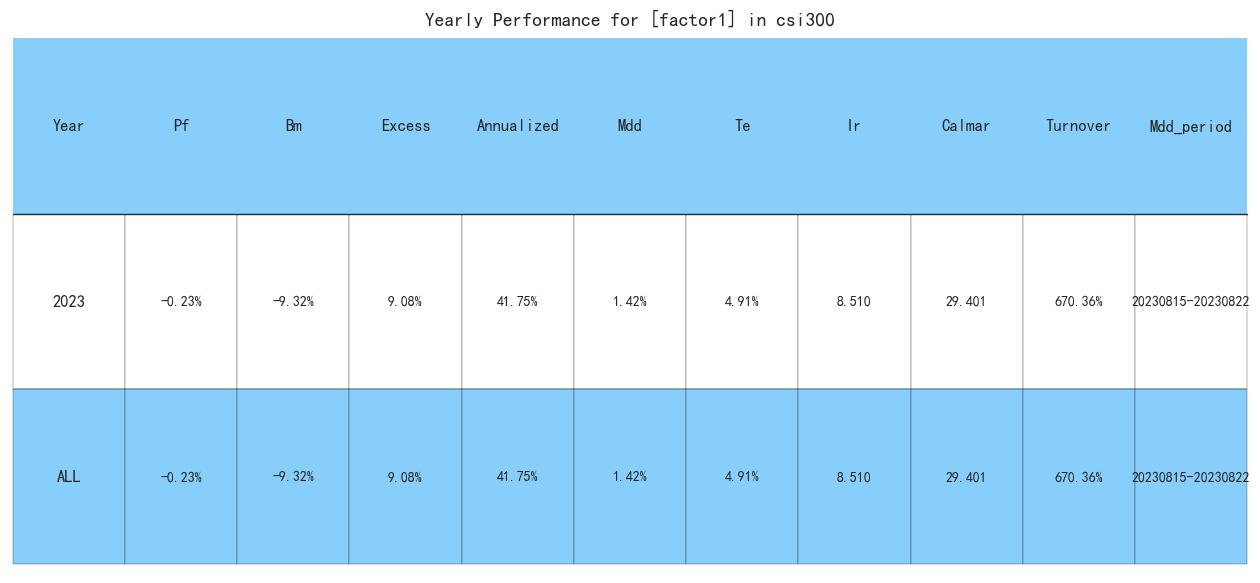

In [143]:
def calc_fmp_perf_period(account : pd.DataFrame , period : Literal['year' , 'yearmonth' , 'month'] = 'year'):
    if period=='year': account[period] = account['trade_date'].astype(str).str[:4]
    elif period == 'yearmonth':  account[period] = account['trade_date'].astype(str).str[:6]
    else: account[period] = account['trade_date'].astype(str).str[4:6]
    group_cols = ['factor_name' , 'benchmark']
    account = account[account['lag'] == 0].sort_values('trade_date')
    prd_stat = account.groupby(group_cols + [period]).\
        apply(eval_fmp_stats , mdd_period= (period != 'month') , include_groups = False).\
        reset_index(group_cols + [period]).reset_index(drop=True)
    all_stat = account.groupby(group_cols).\
        apply(eval_fmp_stats , mdd_period= (period != 'month') , include_groups = False).\
        reset_index(group_cols).reset_index(drop=True).assign(**{period:'ALL'})
    return pd.concat([prd_stat , all_stat])

def calc_fmp_perf_yearly(account : pd.DataFrame):
    return calc_fmp_perf_period(account , 'year')

def plot_table(df , **kwargs):
    tab = Table(df , textprops = {'ha':'center','fontsize':10,'weight':'bold'} , 
                odd_row_color='aliceblue' , 
                cell_kw={'edgecolor':'black','linewidth': 0.2,} , **kwargs)
    tab.col_label_row.set_fontsize(12)
    tab.col_label_row.set_facecolor('lightskyblue')
    tab.columns[tab.column_names[0]].set_fontsize(12)
    list(tab.rows.values())[-1].set_facecolor('lightskyblue')
    return tab

@multi_factor_plot
def plot_fmp_perf_yearly(df : pd.DataFrame , factor_name : Optional[str] = None , benchmark : Optional[str] = None , show = False):
    df , fig = plot_head(df , factor_name , benchmark)
    pct_cols = ['pf','bm','excess','annualized','mdd','te','turnover']
    flt_cols = ['ir','calmar']
    df = df.assign(**df.loc[:,pct_cols].map(lambda x:f'{x:.2%}') , **df.loc[:,flt_cols].map(lambda x:f'{x:.3f}'))
    df.columns = [col.capitalize() for col in df.columns]
    tab = plot_table(df.set_index('Year') , column_definitions = [ColumnDefinition(name='mdd_period', width=2)])
    plot_tail(f'Yearly Performance' , factor_name , benchmark , show , suptitle = False)
    return fig

rslt = calc_fmp_perf_yearly(df)
a = plot_fmp_perf_yearly(rslt)
a['factor1']['csi300']

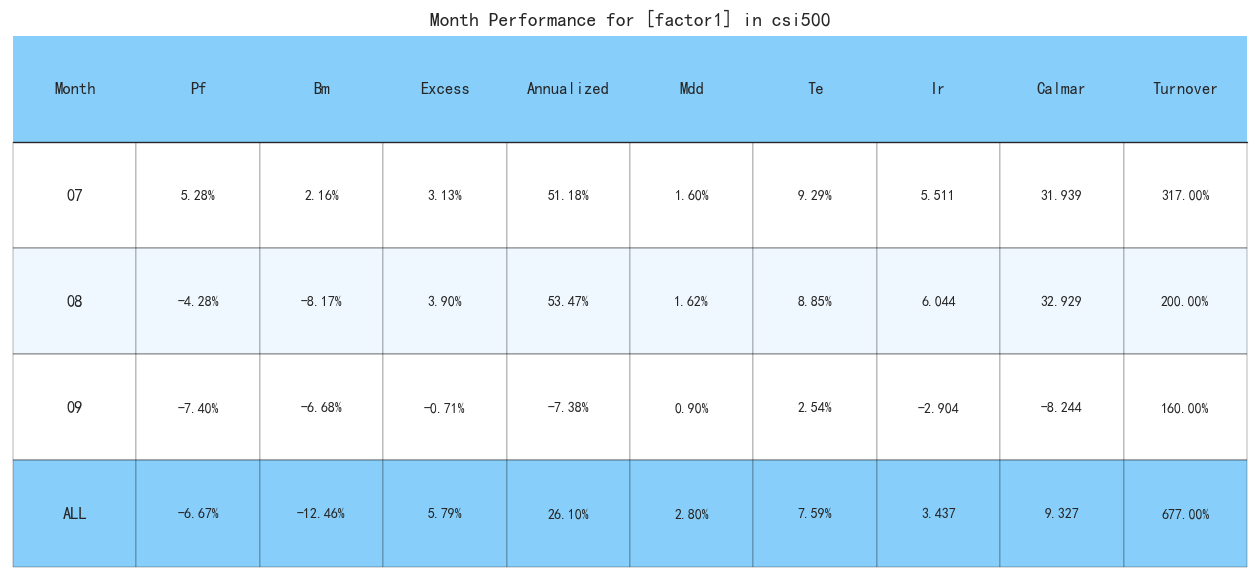

In [145]:
def calc_fmp_perf_monthly(account : pd.DataFrame):
    return calc_fmp_perf_period(account , 'month')

@multi_factor_plot
def plot_fmp_perf_monthly(df : pd.DataFrame , factor_name : Optional[str] = None , benchmark : Optional[str] = None , show = False):
    df , fig = plot_head(df , factor_name , benchmark)
    pct_cols = ['pf','bm','excess','annualized','mdd','te','turnover']
    flt_cols = ['ir','calmar']
    df = df.assign(**df.loc[:,pct_cols].map(lambda x:f'{x:.2%}') , **df.loc[:,flt_cols].map(lambda x:f'{x:.3f}'))
    df.columns = [col.capitalize() for col in df.columns]

    plot_table(df.set_index('Month'))

    plot_tail(f'Month Performance' , factor_name , benchmark , show , suptitle = False)
    return fig

rslt = calc_fmp_perf_monthly(df)
a = plot_fmp_perf_monthly(rslt)
a['factor1']['csi500']

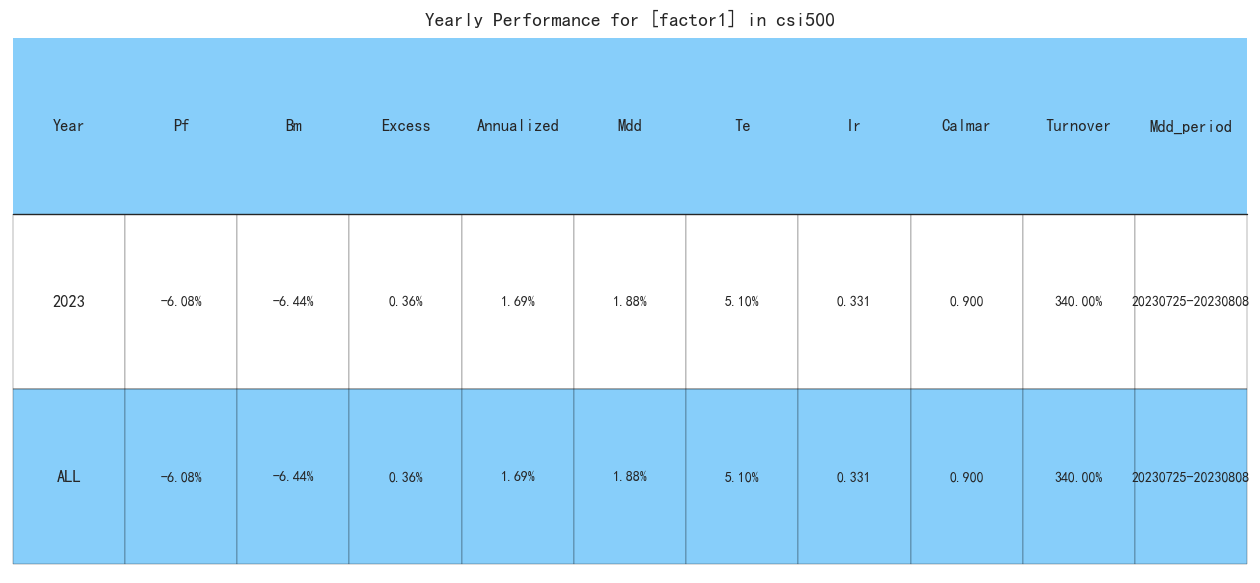

In [3]:
from src.factor.fmp.stat import calc_fmp_perf_yearly
from src.factor.fmp.plot import plot_fmp_perf_yearly

rslt = calc_fmp_perf_yearly(df)
a = plot_fmp_perf_yearly(rslt)
a['factor1']['csi500']

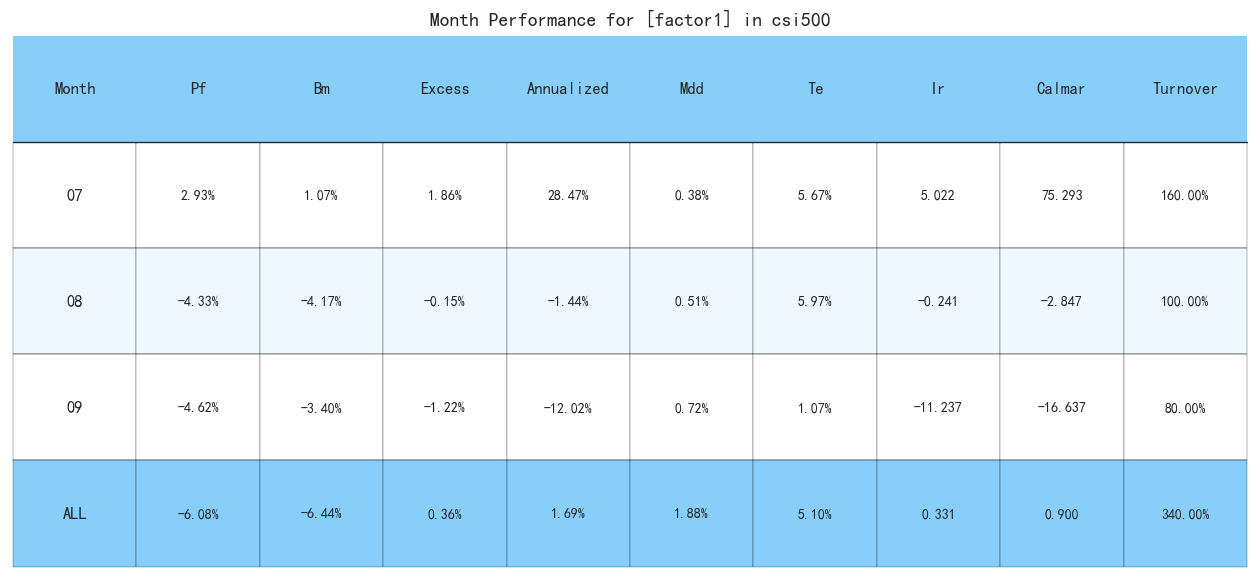

In [4]:
from src.factor.fmp.stat import calc_fmp_perf_monthly
from src.factor.fmp.plot import plot_fmp_perf_monthly

rslt = calc_fmp_perf_monthly(df)
a = plot_fmp_perf_monthly(rslt)
a['factor1']['csi500']

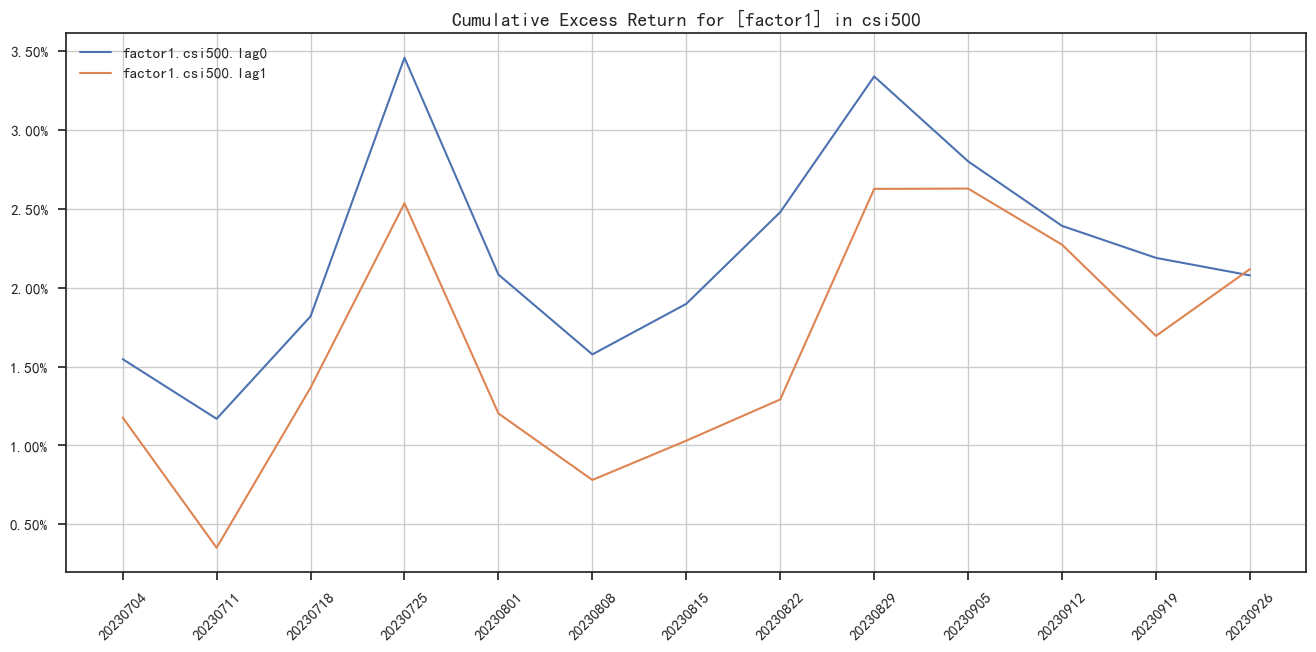

In [5]:
from src.factor.fmp.stat import calc_lag_perf_curve
from src.factor.fmp.plot import plot_lag_perf_curve

rslt = calc_lag_perf_curve(df)
a = plot_lag_perf_curve(rslt)
a['factor1']['csi500']

In [ ]:
def plot_table(df , **kwargs):
    tab = Table(df , textprops = {'ha':'center','fontsize':10,'weight':'bold'} , 
                odd_row_color='lightskyblue' , 
                cell_kw={'edgecolor':'black','linewidth': 0.2,})
    tab.col_label_row.set_fontsize(12)
    tab.col_label_row.set_facecolor('lightskyblue')
    tab.columns['Month'].set_fontsize(12)
    list(tab.rows.values())[-1].set_facecolor('lightskyblue')
    return tab

In [132]:
rslt

,factor_name,benchmark,trade_date,lag0,lag1
0,factor1,csi300,20230704,0.005344,0.005344
1,factor1,csi300,20230711,0.003682,0.004682
2,factor1,csi300,20230718,0.007885,0.006225
3,factor1,csi300,20230725,0.016523,0.013870
4,factor1,csi300,20230801,0.027474,0.027074
5,factor1,csi300,20230808,0.035281,0.036121
6,factor1,csi300,20230815,0.042405,0.045623
7,factor1,csi300,20230822,0.036258,0.037570
8,factor1,csi300,20230829,0.040151,0.041064
9,factor1,csi300,20230905,0.043589,0.043772


In [129]:
rslt

lag0      lag1
factor_name benchmark trade_date                    
factor1     csi300    20230704    0.005344  0.005344
                      20230711    0.003682  0.004682
                      20230718    0.007885  0.006225
                      20230725    0.016523  0.013870
                      20230801    0.027474  0.027074
                      20230808    0.035281  0.036121
                      20230815    0.042405  0.045623
                      20230822    0.036258  0.037570
                      20230829    0.040151  0.041064
                      20230905    0.043589  0.043772
                      20230912    0.045849  0.045906
                      20230919    0.045356  0.041987
                      20230926    0.047728  0.047398
            csi500    20230704    0.043914  0.043583
                      20230711    0.039159  0.036129
                      20230718    0.049910  0.048896
                      20230725    0.063676  0.062397
                      20230801    0.065247  0.069357
                      20230808    0.083330  0.089125
                      20230815    0.087687  0.094968
                      20230822    0.084540  0.091327
                      20230829    0.078739  0.087677
                      20230905    0.078493  0.084888
                      20230912    0.079401  0.083596
                      20230919    0.077049  0.077620
                      20230926    0.076875  0.082010
factor2     csi300    20230704    0.082642  0.087776
                      20230711    0.069346  0.077488
                      20230718    0.069390  0.077805
                      20230725    0.053501  0.058972
                      20230801    0.052680  0.057901
                      20230808    0.055435  0.058950
                      20230815    0.055746  0.059128
                      20230822    0.057519  0.062506
                      20230829    0.053252  0.057592
                      20230905    0.056361  0.063604
                      20230912    0.056326  0.063271
                      20230919    0.055324  0.064793
                      20230926    0.051463  0.066605
            csi500    20230704    0.048483  0.063625
                      20230711    0.039798  0.056165
                      20230718    0.030005  0.051241
                      20230725    0.021730  0.040170
                      20230801    0.020325  0.036725
                      20230808    0.019112  0.033438
                      20230815    0.020385  0.032811
                      20230822    0.020270  0.031811
                      20230829    0.030369  0.036608
                      20230905    0.031229  0.039622
                      20230912    0.027002  0.031404
                      20230919    0.026914  0.031435
                      20230926    0.041510  0.034316

In [17]:
a.keys()

dict_keys(['factor1', 'factor2'])

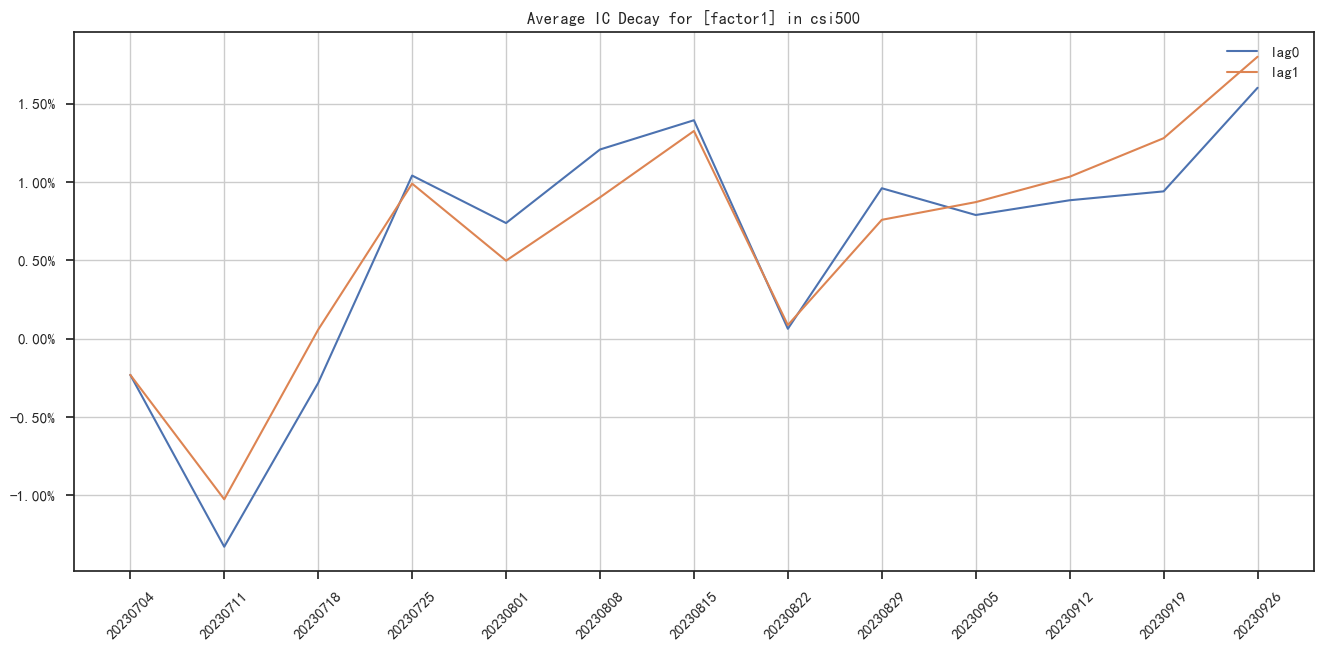

In [13]:
a['factor1']

In [42]:
df

,model_date,st,ed,portfolio,benchmark,turnover,excess,analytic,attribution,factor_name,bm,lag,trade_date,period_end
0,20230703,20230704,20230710,-0.015435,-0.011554,1.0,-0.005880,Analytic(20230703),Attribution(20230704-20230710),factor1,csi300,0,20230704,20230710
1,20230710,20230711,20230717,0.004167,0.010770,0.2,-0.007002,Analytic(20230710),Attribution(20230711-20230717),factor1,csi300,0,20230711,20230717
2,20230717,20230718,20230724,-0.013524,-0.014250,0.2,0.000327,Analytic(20230717),Attribution(20230718-20230724),factor1,csi300,0,20230718,20230724
3,20230724,20230725,20230731,0.051554,0.055749,0.2,-0.004595,Analytic(20230724),Attribution(20230725-20230731),factor1,csi300,0,20230725,20230731
4,20230731,20230801,20230807,-0.008911,-0.005989,0.2,-0.003322,Analytic(20230731),Attribution(20230801-20230807),factor1,csi300,0,20230801,20230807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,20230828,20230829,20230904,0.035962,0.032896,0.2,0.002667,None,None,factor2,csi500,1,20230829,20230904
100,20230904,20230905,20230911,-0.010908,-0.009447,0.2,-0.001861,None,None,factor2,csi500,1,20230905,20230911
101,20230911,20230912,20230918,-0.013044,-0.009530,0.2,-0.003914,None,None,factor2,csi500,1,20230912,20230918
102,20230918,20230919,20230925,-0.007018,-0.009252,0.2,0.001834,None,None,factor2,csi500,1,20230919,20230925
